In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptops-price-dataset/laptops.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **DATA EXPLORATION**

In [3]:
df=pd.read_csv("/kaggle/input/laptops-price-dataset/laptops.csv")

In [4]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [5]:
df.shape

(2160, 12)

In [6]:
df.size

25920

**From this its clear that we have 12 columns**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [8]:
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [9]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [10]:
df.tail()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99
2159,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,Refurbished,Razer,Book,Intel Evo Core i7,16,256,SSD,NaN,13.4,Yes,1699.99


# **DATA CLEANING**

In [11]:
#checking for null values

df.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

*From the above code we can see that GPU has more null values ,so i'm going to remove the column.*

In [12]:
df.drop(['GPU'],axis=1,inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
df.duplicated().value_counts()

False    2114
dtype: int64

# **DATA VISUALIZATION**

In [15]:
df.nunique()

Laptop          2114
Status             2
Brand             27
Model            119
CPU               27
RAM                9
Storage           11
Storage type       2
Screen            28
Touch              2
Final Price     1409
dtype: int64

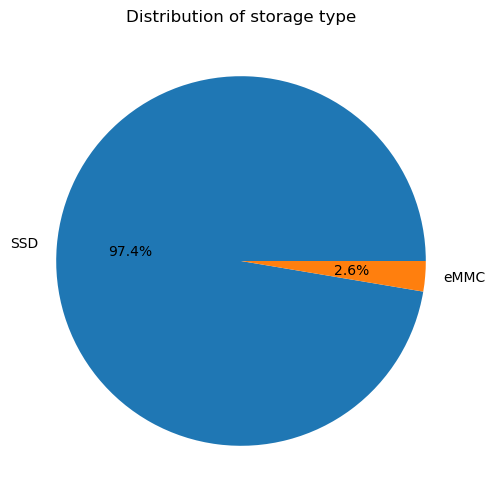

In [16]:
plt.figure(figsize=(8,6))
sizes=df['Storage type'].value_counts()
plt.pie(sizes,labels=sizes.index,autopct='%1.1f%%')
plt.title('Distribution of storage type')
plt.show()

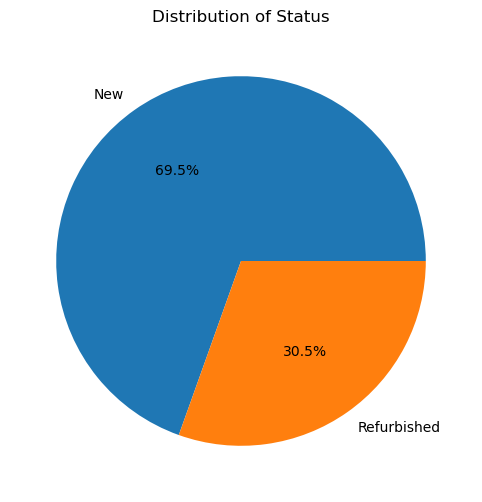

In [17]:
plt.figure(figsize=(8,6))
sizes=df['Status'].value_counts()
plt.pie(sizes,labels=sizes.index,autopct='%1.1f%%')
plt.title('Distribution of Status')
plt.show()

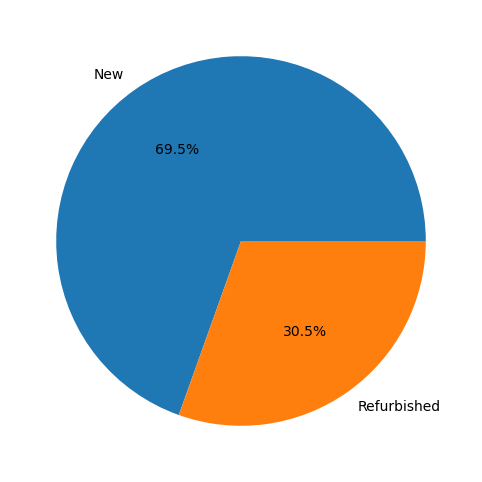

In [18]:
plt.figure(figsize=(8,6))
size=df['Touch'].value_counts()
plt.pie(sizes,labels=sizes.index,autopct='%1.1f%%')
plt.show()

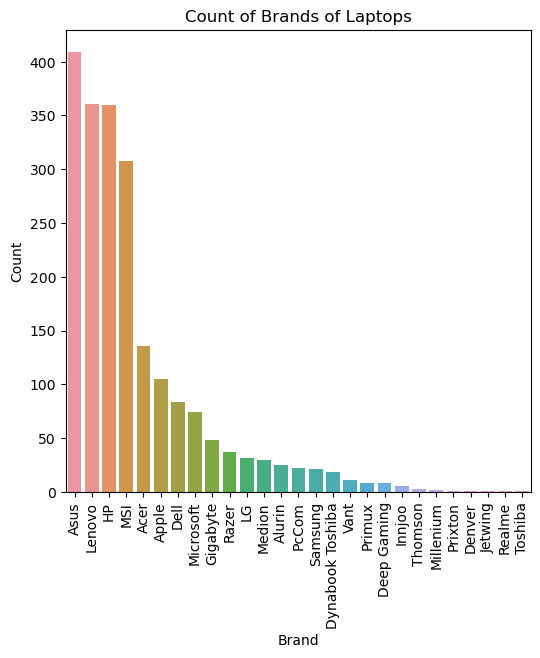

In [19]:
plt.figure(figsize=(6, 6))
touch_counts = df['Brand'].value_counts()
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of Brands of Laptops')
plt.show()

Text(0.5, 1.0, 'Count of Models of Laptops')

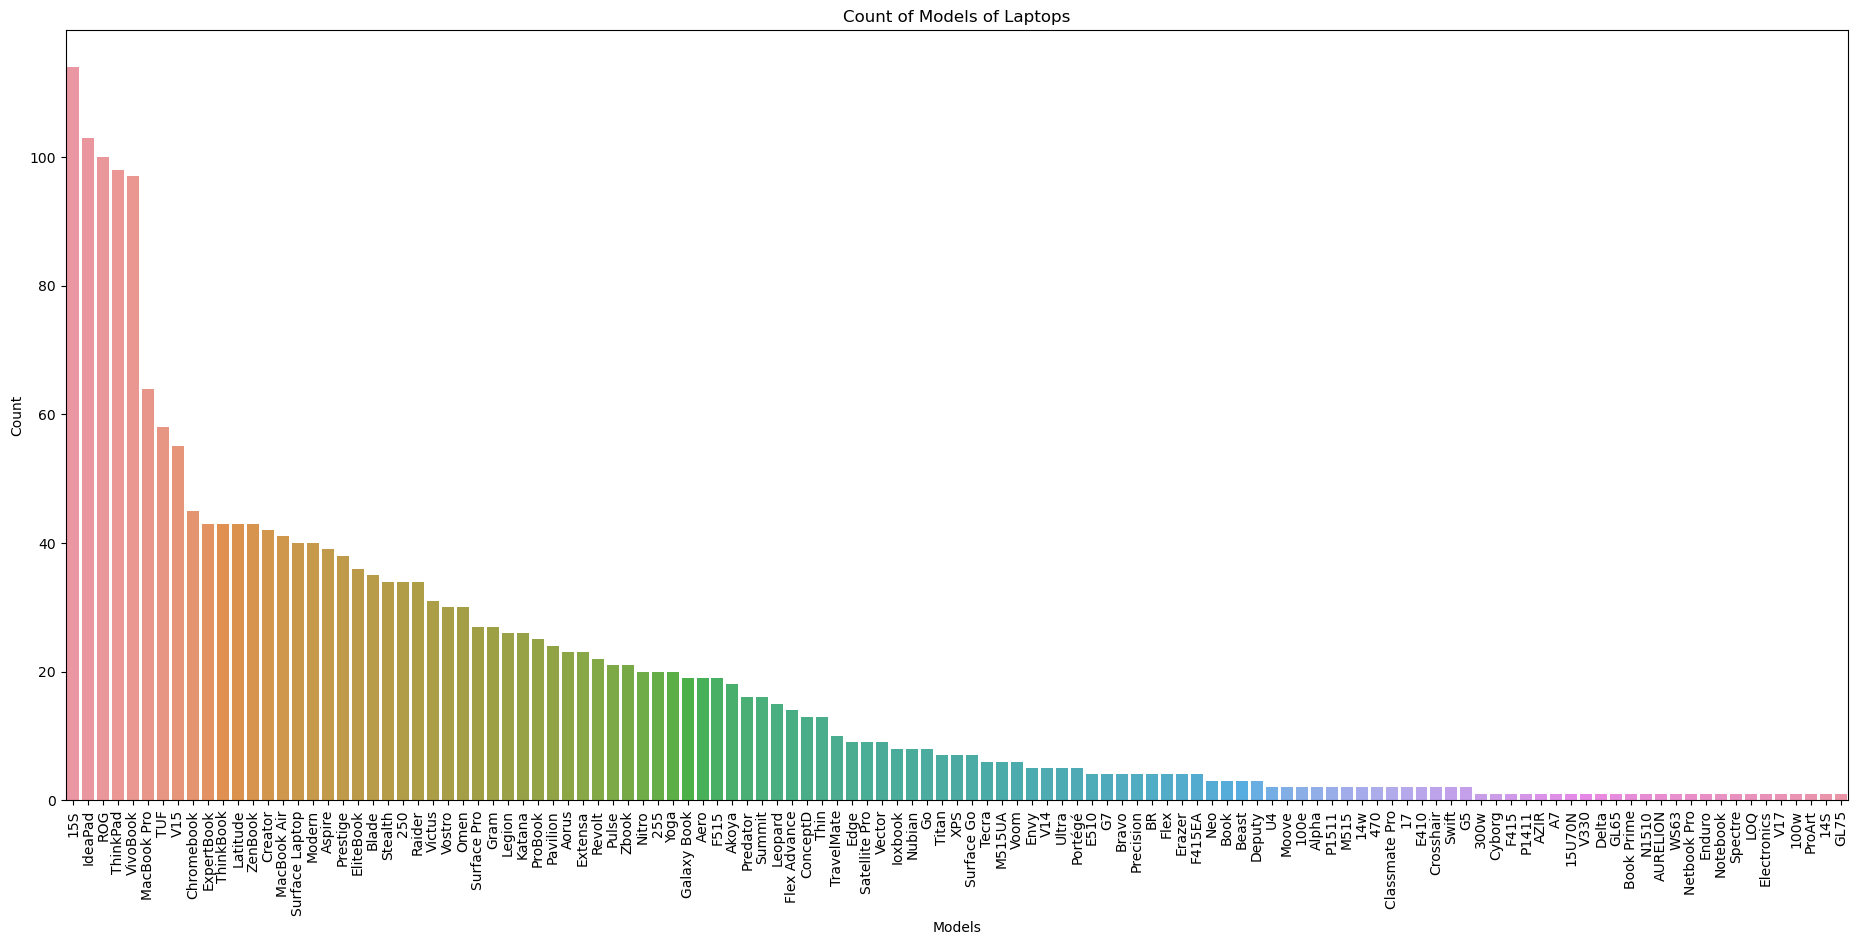

In [20]:
plt.figure(figsize=(23, 10))
touch_counts = df['Model'].value_counts()
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of Models of Laptops')



Text(0.5, 1.0, 'Count of Screen of Laptops')

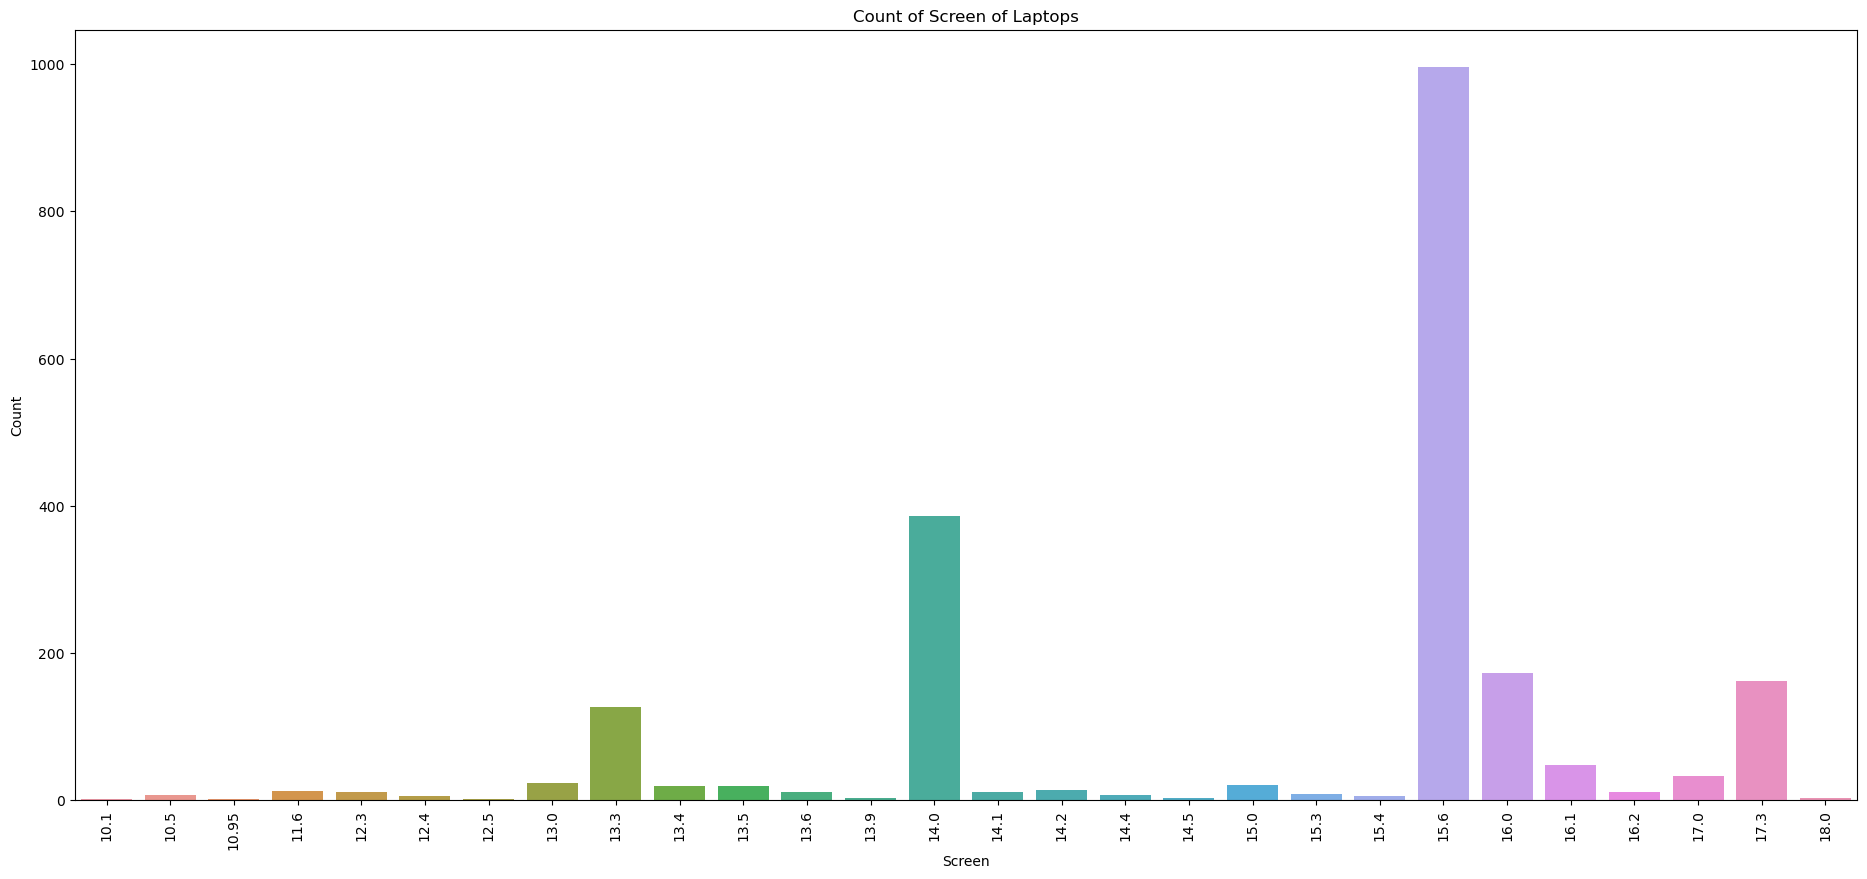

In [21]:
plt.figure(figsize=(23, 10))
touch_counts = df['Screen'].value_counts()
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.xlabel('Screen')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of Screen of Laptops')

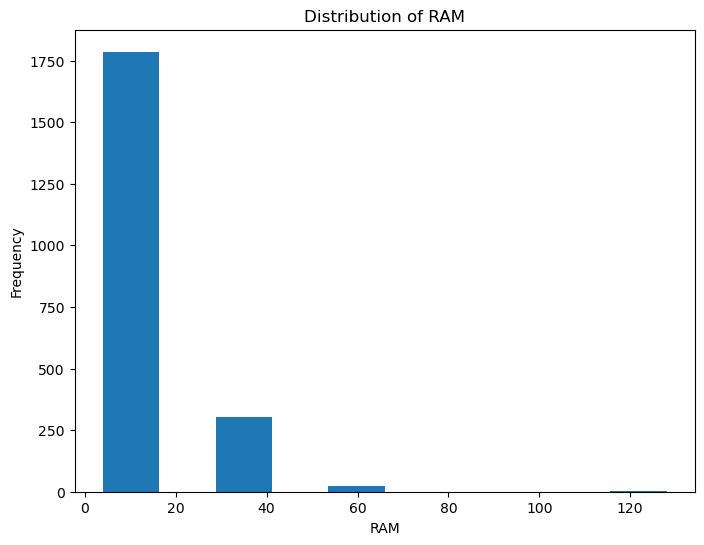

In [22]:
#Distribution of RAM

plt.figure(figsize=(8,6))
plt.hist(df['RAM'],bins =10)
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.title('Distribution of RAM')
plt.show()


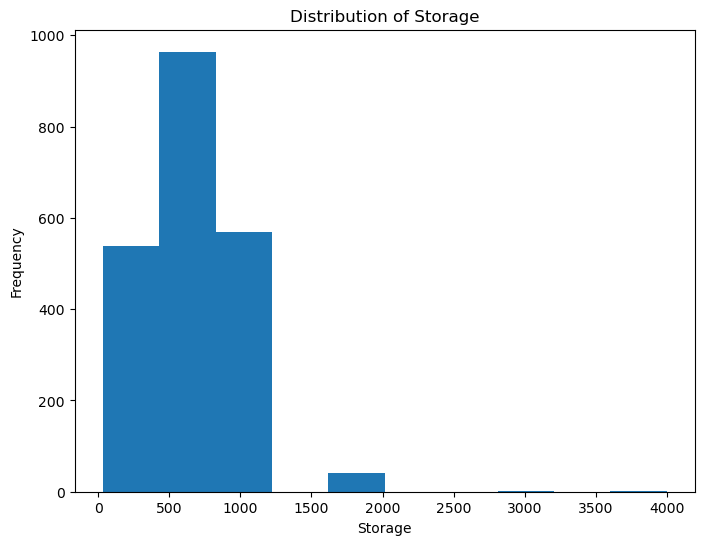

In [23]:
#Distribution of storage
plt.figure(figsize=(8,6))
plt.hist(df['Storage'],bins=10)
plt.xlabel('Storage')
plt.ylabel('Frequency')
plt.title('Distribution of Storage')
plt.show()


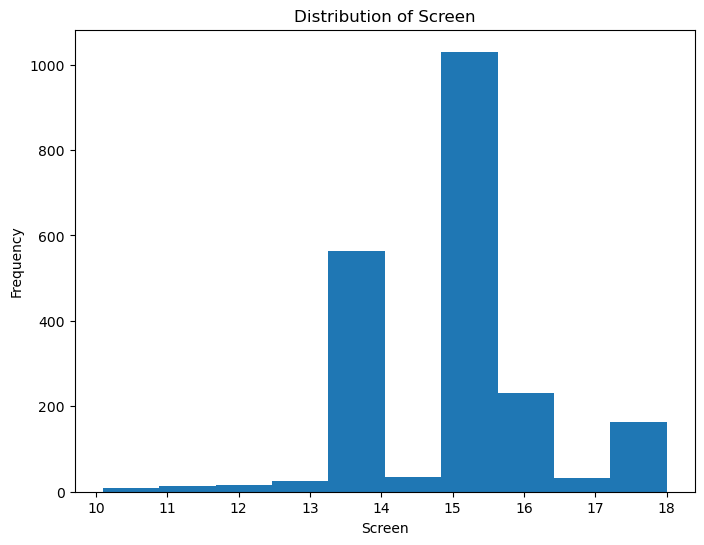

In [24]:
plt.figure(figsize=(8,6))
plt.hist(df['Screen'],bins=10)
plt.xlabel('Screen')
plt.ylabel('Frequency')
plt.title('Distribution of Screen')
plt.show()

# **EXPLORATORY DATA ANALYSIS**

**Feature Engineeering**
Label encoding - Label encoding is technique used to convert categorical variables into numerical values. Unlike one-hot encoding, which creates binary columns for each category, label encoding assigns a unique integer value to each category.
 
 Here's how label encoding works:
 
1)Identify Categorical Variables: First, identify the categorical variables in your dataset, similar to the first step in one-hot encoding.

2)Assign Integer Labels: For each unique category in the categorical variable, assign a unique integer label starting from 0 to (number of categories - 1).

3)Replace Categories with Labels: Replace the original categorical values with their corresponding integer labels.

In [25]:
label_encoder = LabelEncoder()
df['Status_encoded'] = label_encoder.fit_transform(df['Status'])
df['Storage_encoded'] = label_encoder.fit_transform(df['Storage type'])
df['Touch_encoded'] = label_encoder.fit_transform(df['Touch'])

# **Corelation Analysis**

/tmp/ipykernel_20/521971222.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix= df.corr()


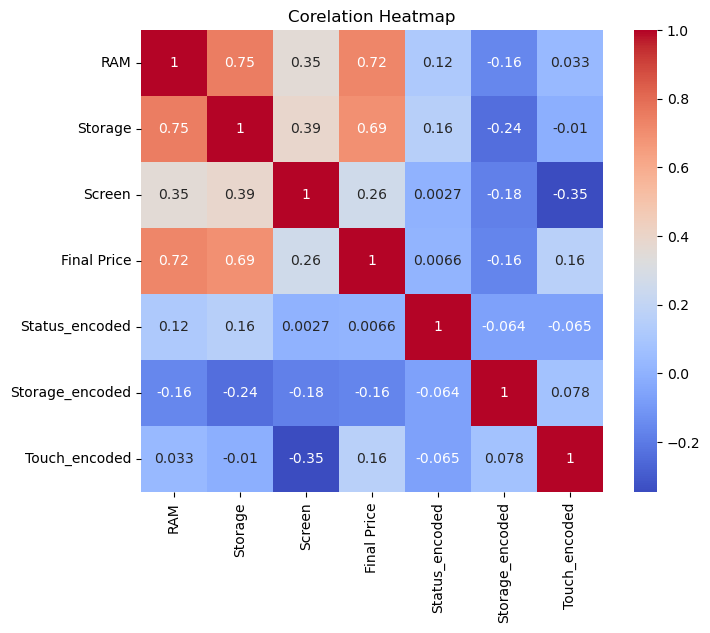

In [26]:
corr_matrix= df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',square=True)
plt.title('Corelation Heatmap')
plt.show()

# **Data Modeling**

In [27]:
X = df[['RAM', 'Storage', 'Screen', 'Status_encoded', 'Storage_encoded', 'Touch_encoded']]  # Independent variables (features)
y = df['Final Price']  # Dependent variable (target)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the laptop prices for the test data
y_pred = model.predict(X_test)

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Assuming you have y_test (actual values) and y_pred (predicted values) from your model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Explained Variance Score: {explained_var:.2f}")

Mean Squared Error (MSE): 268391.07
Root Mean Squared Error (RMSE): 518.06
Mean Absolute Error (MAE): 348.84
R-squared (R2): 0.65
Explained Variance Score: 0.65


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



# Create regression models
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regression", DecisionTreeRegressor(random_state=42)),
    ("Random Forest Regression", RandomForestRegressor(random_state=42)),
]

# Function to get the mean accuracy from cross-validation
def get_accuracy(model):
    return cross_val_score(model, X, y, cv=5, scoring="r2").mean()

# Get accuracy for each model
accuracies = {name: get_accuracy(model) for name, model in models}

# Find the best model with the highest accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]

# Print results
print("Regression Model Accuracies:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")

print("\nBest Model:")
print(f"{best_model_name} has the highest accuracy: {best_model_accuracy:.4f}")

Regression Model Accuracies:
Linear Regression: 0.5748
Decision Tree Regression: 0.5902
Random Forest Regression: 0.5966

Best Model:
Random Forest Regression has the highest accuracy: 0.5966


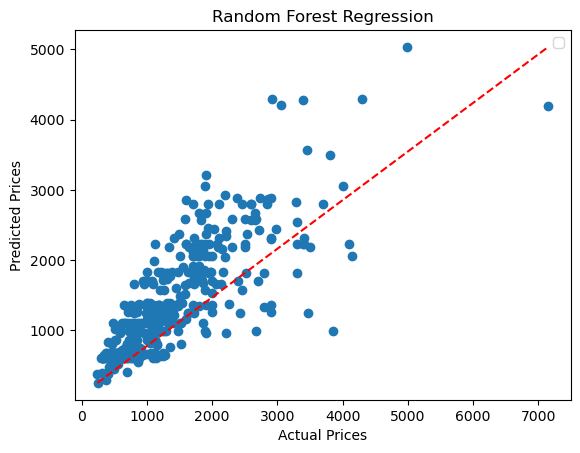

In [31]:
# Train the Random Forest Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')


plt.legend()
plt.title("Random Forest Regression")
plt.show()

# **Evaluation**

Mean Squared Error (MSE): MSE measures the average squared difference between the actual target values and the predicted values. Lower values indicate better performance.


Root Mean Squared Error (RMSE): RMSE is the square root of MSE and provides a more interpretable metric in the original units of the target variable.

Mean Absolute Error (MAE): MAE calculates the average absolute difference between the actual and predicted values. Like MSE, lower values indicate better performance.

R-squared (R2): R-squared measures the proportion of the variance in the target variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model does not explain any variance.

Adjusted R-squared: Adjusted R-squared penalizes the model for including irrelevant features, addressing potential overfitting issues with R-squared.

Mean Absolute Percentage Error (MAPE): MAPE calculates the percentage difference between the actual and predicted values, providing an interpretable measure of error.

Explained Variance Score: This metric quantifies the proportion of variance in the target variable explained by the model. A score of 1.0 indicates a perfect fit.

Quantile Loss (Pinball Loss): This metric is useful for quantile regression tasks and measures the pinball loss, which quantifies the accuracy of predicted quantiles.

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Assuming you have y_test (actual values) and y_pred (predicted values) from your model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Explained Variance Score: {explained_var:.2f}")

Mean Squared Error (MSE): 267987.36
Root Mean Squared Error (RMSE): 517.67
Mean Absolute Error (MAE): 343.02
R-squared (R2): 0.65
Explained Variance Score: 0.66
